In [15]:
import pandas as pd
from matplotlib.patches import Rectangle
import utils
import numpy as np

In [16]:
# 1. Gaze Data import and computation of X and Y gaze coordinates

In [23]:
#Read gaze data using pandas library
data = pd.read_csv("data/gazeData.csv", skiprows=25)
# set display.max_columns to none, to show all the columns when using head()
pd.set_option('display.max_columns', None)

In [24]:
# preview gaze data
# Note: see inputData/gazeData.csv for columns meta-data (under Section #METADATA)
data.head()

,Row,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource.1,ET_GazeLeftx,ET_GazeLefty,ET_GazeRightx,ET_GazeRighty,ET_PupilLeft,ET_PupilRight,ET_TimeSignal,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight
0,1,122.0544,1.0,StartSlide,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,128.9448,NaN,NaN,NaN,NaN,NaN,img,1.0,951.0,486.0,970.0,503.0,-1.000000,-1.0,141.658,566.252441,569.685181,0.598863,0.525673,0.429841,0.519144,0.0,0.0
2,3,132.9790,1.0,StartMedia,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,137.2724,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,966.0,519.0,-1.000000,-1.0,149.984,566.216125,569.593445,0.599070,0.525453,0.429996,0.518994,0.0,0.0
4,5,145.6203,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,-1.0,-1.0,2.614349,-1.0,158.333,566.265381,-1.000000,0.599004,0.525297,-1.000000,-1.000000,0.0,4.0


In [25]:
# Replace -1 values with NaN
data = data.replace(-1,np.nan)

In [26]:
# compute the mean X and Y positions of the gazes based on the X-coordinate of the gaze points of the left and right eyes
data["GazeX"] = data[["ET_GazeLeftx","ET_GazeRightx"]].mean(axis=1)
data["GazeY"] = data[["ET_GazeLefty","ET_GazeRighty"]].mean(axis=1)

In [27]:
# preview gaze data with mean X and Y gaze positions columns
data.head()

,Row,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource.1,ET_GazeLeftx,ET_GazeLefty,ET_GazeRightx,ET_GazeRighty,ET_PupilLeft,ET_PupilRight,ET_TimeSignal,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight,GazeX,GazeY
0,1,122.0544,1.0,StartSlide,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,128.9448,NaN,NaN,NaN,NaN,NaN,img,1.0,951.0,486.0,970.0,503.0,NaN,NaN,141.658,566.252441,569.685181,0.598863,0.525673,0.429841,0.519144,0.0,0.0,960.5,494.5
2,3,132.9790,1.0,StartMedia,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,137.2724,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,966.0,519.0,NaN,NaN,149.984,566.216125,569.593445,0.599070,0.525453,0.429996,0.518994,0.0,0.0,952.0,509.5
4,5,145.6203,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,NaN,NaN,2.614349,NaN,158.333,566.265381,NaN,0.599004,0.525297,NaN,NaN,0.0,4.0,938.0,500.0


In [28]:
# 2. Plot gaze data and AOIs; Assign gaze points to AOIs

In [29]:
# Read file with AOI coordinates
aois = pd.read_csv("data/aois_definition.csv")

In [30]:
# Display the user defined areas of interest
aois

,Unnamed: 0,AOI,xStart,yStart,width,height
0,0,Paragraph1,86.153846,170.769231,462.769231,194.461538
1,1,Paragraph2,569.846154,169.538462,459.076923,200.615385
2,2,Paragraph3,80.000000,396.000000,471.384615,150.153846
3,3,Paragraph4,572.307692,394.769231,459.076923,155.076923
4,4,Paragraph5,78.769231,570.769231,475.076923,204.307692
5,5,Paragraph6,97.230769,799.692308,914.461539,176.000000
6,6,Text_Area,68.923077,169.538462,964.923077,830.769230
7,7,SubFigure1,1101.538462,383.692308,251.076923,435.692308
8,8,SubFigure2,1358.769231,382.461538,232.615384,446.769231
9,9,SubFigure3,1602.461538,380.000000,247.384616,452.923077


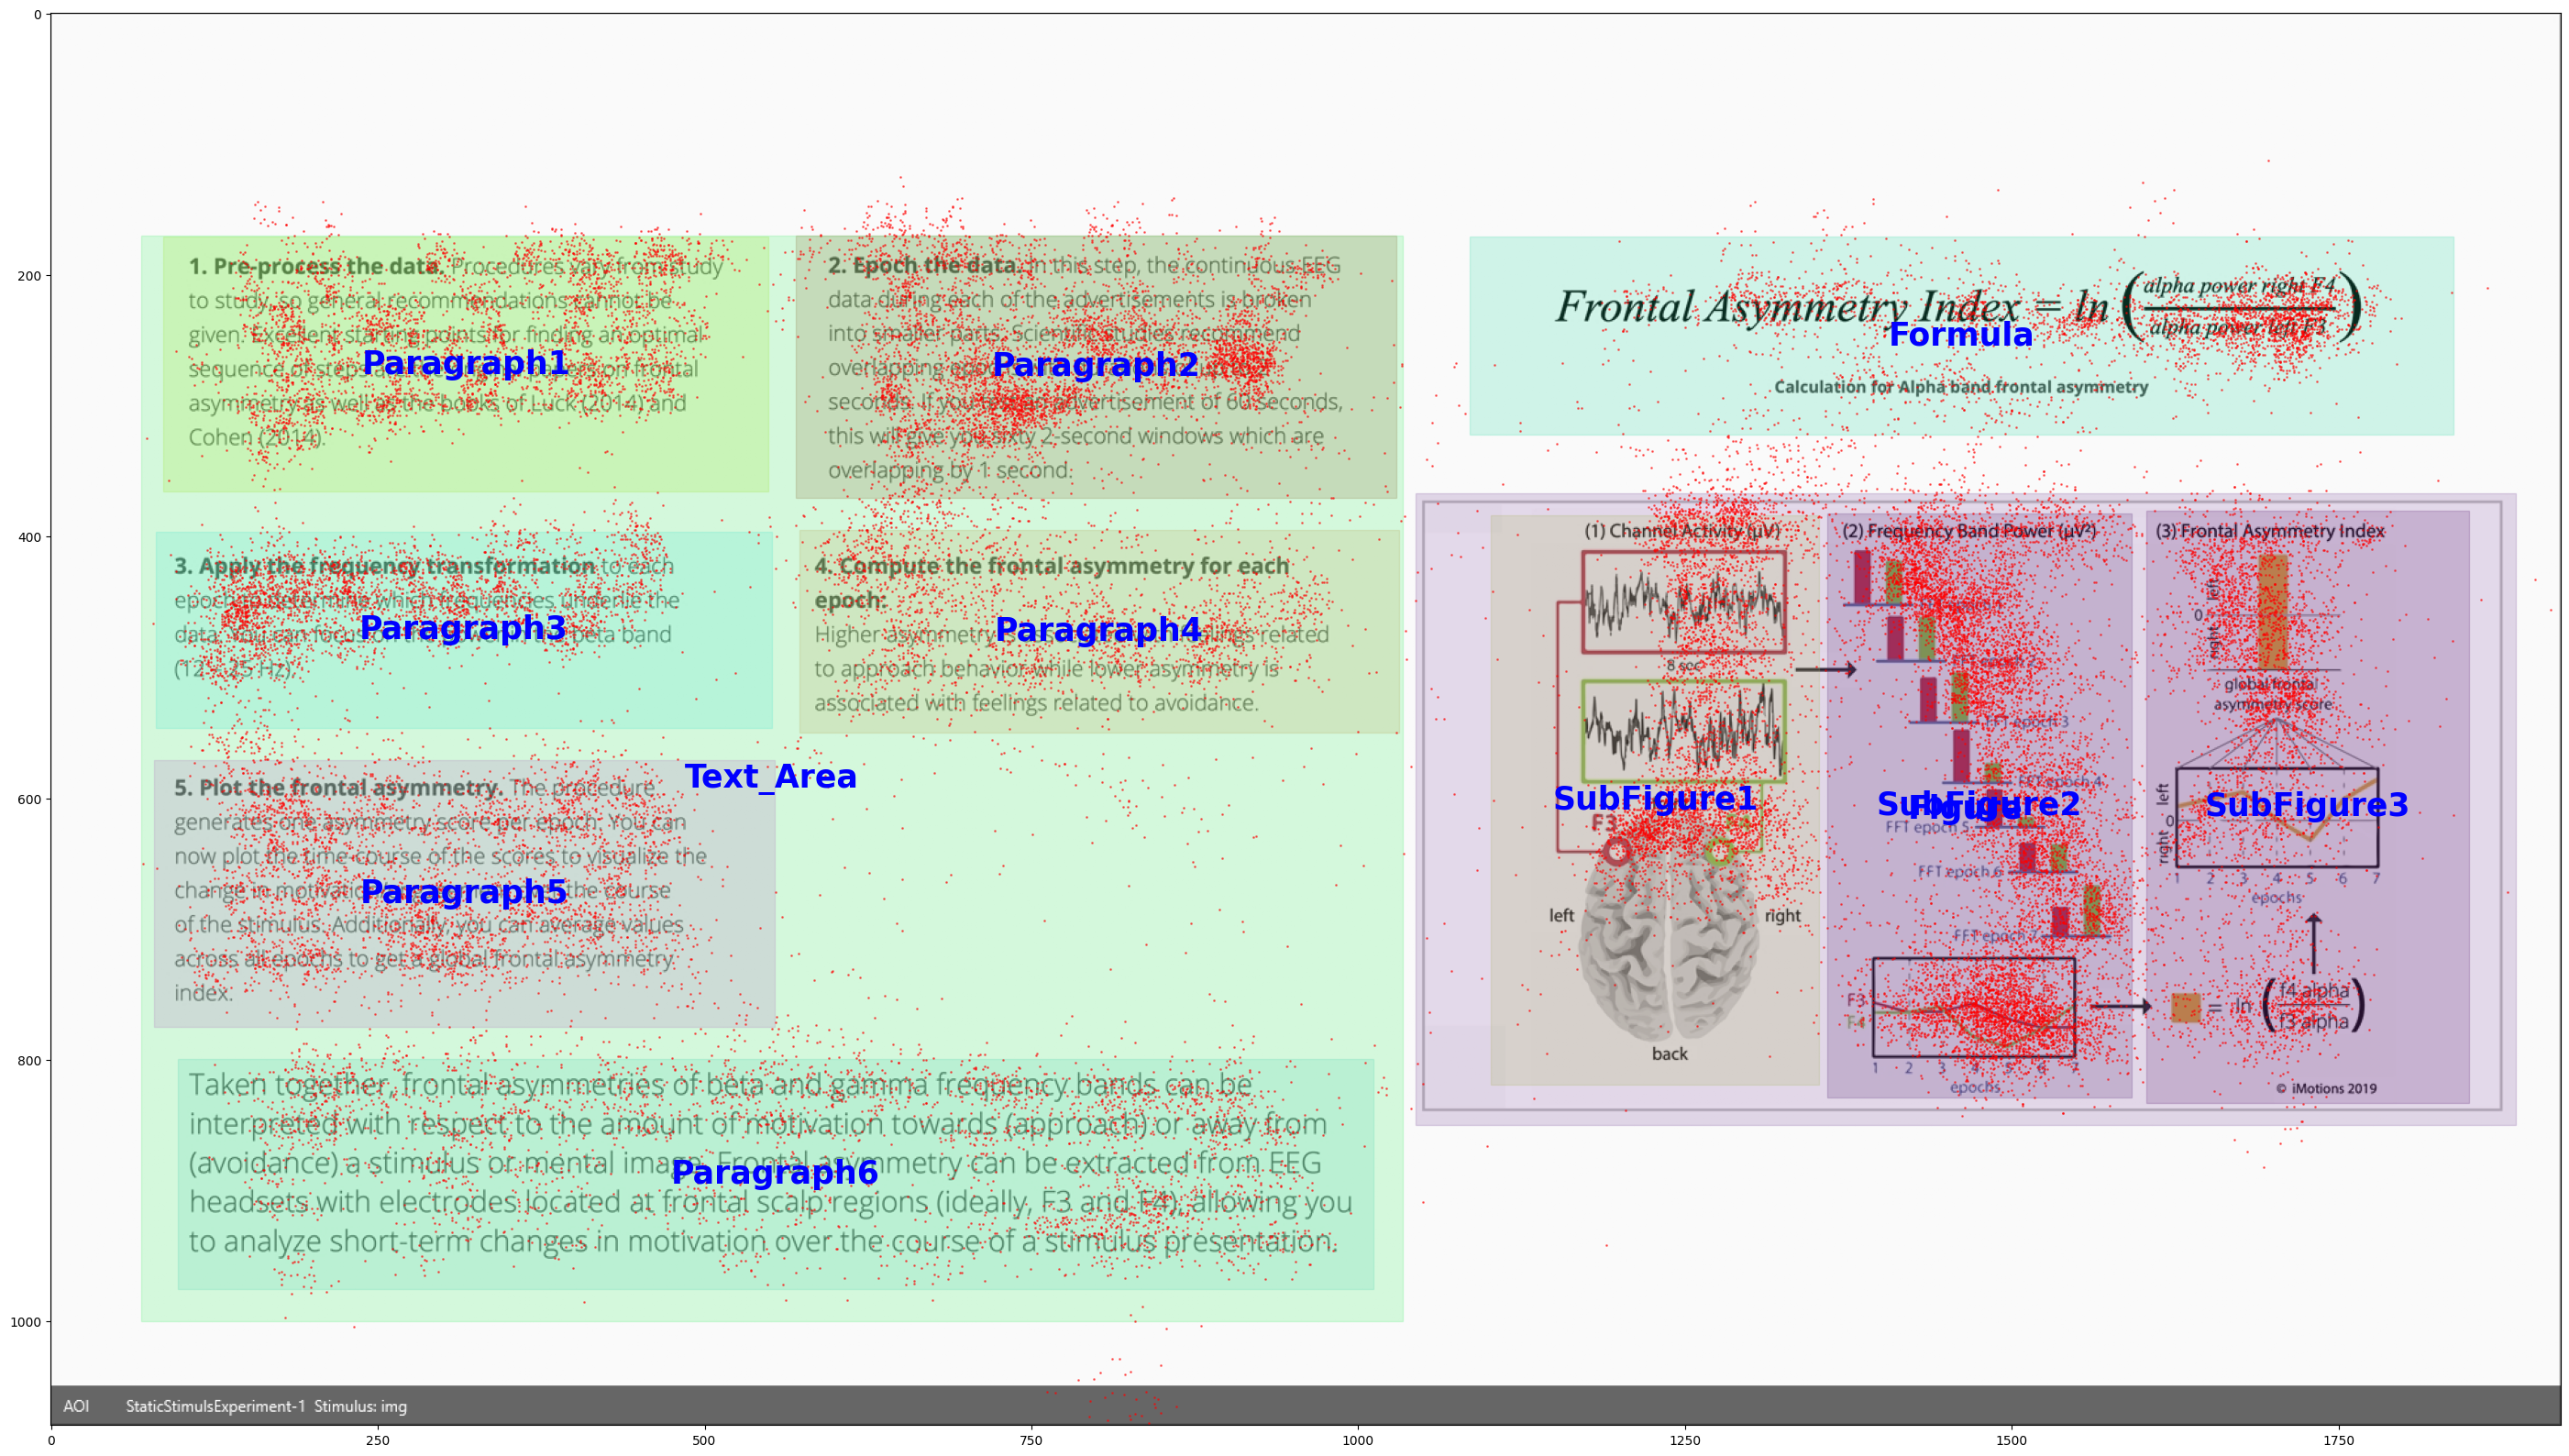

In [31]:
# Initiate a coordinate system with a background image
fig, ax = utils.initPlotContainer("data/stimulus.png")
# Plot gazes
ax.plot(data["GazeX"], data["GazeY"],'o',alpha=0.5, markersize=1, color='red')
# generate a list of random colors (to be assigned to the different AOIs)
colors = utils.generateRandomColors(12)

# plot AOIs
# iterate over the rows in aois gazeDataframe
for index, row in aois.iterrows():
    # plot each AOI as a rectangle
    ax.add_patch(Rectangle((row["xStart"], row["yStart"]), row["width"], row["height"],color=colors[index],alpha=0.2))
    # add text with the AOI name     
    ax.annotate(row["AOI"], (row["xStart"]+row["width"]/2, row["yStart"]+row["height"]/2), color='blue', weight='bold', fontsize=25, ha='center', va='center')

In [32]:
# Assign gaze points to AOIs

# copy gazeData to gazeDataWithAOIs
gazeDataWithAOIs = data.copy(deep=True)

# iterate over the rows in aois dataframe
for index, row in aois.iterrows():
    # get the name of AOI
    aoiName = row["AOI"]
    # add a new column with key=aoiName and value=(0 or 1) depending on whether the gaze point in within the AOI in question 
    gazeDataWithAOIs[aoiName] = data.apply(lambda x : utils.pointInRect(x["GazeX"],x["GazeY"],row["xStart"],row["yStart"],row["width"],row["height"]),axis=1)

In [33]:
# preview gaze data with AOIs mapping
gazeDataWithAOIs.head()

,Row,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource.1,ET_GazeLeftx,ET_GazeLefty,ET_GazeRightx,ET_GazeRighty,ET_PupilLeft,ET_PupilRight,ET_TimeSignal,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight,GazeX,GazeY,Paragraph1,Paragraph2,Paragraph3,Paragraph4,Paragraph5,Paragraph6,Text_Area,SubFigure1,SubFigure2,SubFigure3,Figure,Formula
0,1,122.0544,1.0,StartSlide,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1,2,128.9448,NaN,NaN,NaN,NaN,NaN,img,1.0,951.0,486.0,970.0,503.0,NaN,NaN,141.658,566.252441,569.685181,0.598863,0.525673,0.429841,0.519144,0.0,0.0,960.5,494.5,0,0,0,1,0,0,1,0,0,0,0,0
2,3,132.9790,1.0,StartMedia,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
3,4,137.2724,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,966.0,519.0,NaN,NaN,149.984,566.216125,569.593445,0.599070,0.525453,0.429996,0.518994,0.0,0.0,952.0,509.5,0,0,0,1,0,0,1,0,0,0,0,0
4,5,145.6203,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,NaN,NaN,2.614349,NaN,158.333,566.265381,NaN,0.599004,0.525297,NaN,NaN,0.0,4.0,938.0,500.0,0,0,0,1,0,0,1,0,0,0,0,0


In [34]:
# Save gazeData with AOIs
gazeDataWithAOIs.to_csv("data/gazeDataWithAOIs.csv",  index=False)